In [1]:
import numpy as np
import pandas as pd
from keras import Model
import keras.backend as K
from keras.layers import Embedding,Reshape,Input,Dot
import keras

C:\Users\30249\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
'''
- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings
'''
rating_data=pd.read_csv("./ml-1m/ratings.dat",header=None,names=["UserID","MovieID","Rating","Timestamp"],sep='::')
rating_data=rating_data.sample(frac=1)
#len(rating_data)
traindata=rating_data[:int(len(rating_data)*8/10)]
validdata=rating_data[int(len(rating_data)*8/10):int(len(rating_data)*9/10)]
testdata=rating_data[int(len(rating_data)*9/10):]
print(len(traindata),len(validdata),len(testdata))

C:\Users\30249\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


800167 100021 100021


In [41]:
num_user = np.max(traindata["UserID"])
num_movie = np.max(traindata["MovieID"])
print(num_user,num_movie,len(traindata))

6040 3952 800167


In [42]:
K.clear_session()
def Recmand_model(num_user,num_movie,k):
    input_uer = Input(shape=[None,],dtype="int32")
    print(input_uer)
    model_uer = Embedding(num_user+1,k,input_length = 1)(input_uer)
    model_uer = Reshape((k,))(model_uer)
    
    input_movie = Input(shape=[None,],dtype="int32")
    model_movie  = Embedding(num_movie+1,k,input_length = 1)(input_movie)
    model_movie = Reshape((k,))(model_movie)
    
    out = Dot(1)([model_uer,model_movie])
    model = Model(inputs=[input_uer,input_movie], outputs=out)
    model.compile(loss='mse', optimizer='Adam')
    model.summary()
    return model

In [43]:
model = Recmand_model(num_user,num_movie,100)

Tensor("input_1:0", shape=(?, ?), dtype=int32)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       604100      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 100)       395300      input_2[0][0]                    
______________________________________________________________

In [44]:
train_user = traindata["UserID"].values
train_movie = traindata["MovieID"].values
train_x = [train_user,train_movie]
train_y = traindata["Rating"].values

valid_user = validdata["UserID"].values
valid_movie = validdata["MovieID"].values
valid_x = [valid_user,valid_movie]
valid_y = validdata["Rating"].values

In [45]:
history=model.fit(train_x,train_y,batch_size = 100000,epochs =200,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=0)],validation_data=(valid_x,valid_y))

Train on 800167 samples, validate on 100021 samples
Epoch 1/200
800167/800167 [==============================] - 1s 1us/step - loss: 14.0753 - val_loss: 14.0467
Epoch 2/200
800167/800167 [==============================] - 0s 0us/step - loss: 14.0646 - val_loss: 14.0398
Epoch 3/200
800167/800167 [==============================] - 0s 0us/step - loss: 14.0454 - val_loss: 14.0144
Epoch 4/200
800167/800167 [==============================] - 0s 0us/step - loss: 14.0006 - val_loss: 13.9483
Epoch 5/200
800167/800167 [==============================] - 0s 0us/step - loss: 13.9046 - val_loss: 13.8113
Epoch 6/200
800167/800167 [==============================] - 0s 0us/step - loss: 13.7257 - val_loss: 13.5711
Epoch 7/200
800167/800167 [==============================] - 0s 0us/step - loss: 13.4317 - val_loss: 13.1986
Epoch 8/200
800167/800167 [==============================] - 0s 0us/step - loss: 12.9970 - val_loss: 12.6745
Epoch 9/200
800167/800167 [==============================] - 0s 0us/step - l

In [31]:
pre=model.predict([testdata["UserID"].values,testdata["MovieID"].values])

In [32]:
test=model.evaluate([testdata["UserID"].values,testdata["MovieID"].values],testdata["Rating"].values)

100021/100021 [==============================] - 3s 31us/step


In [33]:
test

0.7323691818606423

In [34]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

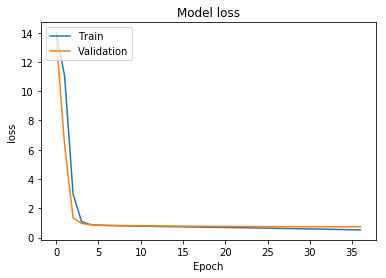

In [35]:
import matplotlib.pyplot as plt


# 绘制训练 & 验证的准确率值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("./modle_loss.png")
plt.show()

In [21]:
train_user

array([5005, 4983, 4785, ..., 4868, 4907, 5530], dtype=int64)